# Effects of Loan Features on Interest Rates - Part Two
## by Bashar Chowdhury

## Investigation Overview

> In this investigation, I wanted to look at the factors that could be used to predict the interest rate offered on loans.

## Dataset Overview

> The dataset is from a peer-to-peer lending start-up called Prosper. It consists of 113,937 loans and has 81 variables on each loan including the borrower's income, the type of loan and the loan amount.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe and show all rows
df = pd.read_csv('prosperLoanData.csv', index_col = False)
pd.set_option('display.max_columns', None)

In [3]:
# preliminary wrangling

# convert dates to datetime object
df[['ListingCreationDate','ClosedDate','DateCreditPulled','FirstRecordedCreditLine','LoanOriginationDate']] = df[['ListingCreationDate','ClosedDate','DateCreditPulled','FirstRecordedCreditLine','LoanOriginationDate']].apply(pd.to_datetime, format='%Y-%m-%d %H:%M:%S')

# convert string variables to categorical type
cat_vars = ['BorrowerState','IncomeVerifiable','ListingCategory (numeric)', 'LoanStatus']
for var in cat_vars:
    df[var] = df[var].astype('category')
    
# drop any duplicated loan entries
df.drop_duplicates(inplace = True)

# keep loan data with an orgination date of July 2009 or after, as some variables of interest such as Prosper Score are measured differently while data on other variables such as EstimatedEffectiveYield are not available before this time
df = df.loc[df['LoanOriginationDate'] > '2009-07-01 00:00:00']

# Create a new catergorical column ListingCat from ListingCategory (numeric) for better visualization and interpretation of plots
loan_type_markers = {0:'Not Available',1:'Debt Consolidation',2:'Home Improvement',3:'Business',4:'Personal Loan',5:'Student Use',6:'Auto',7:'Other',8:'Baby and Adoption',9:'Boat',10:'Cosmetic Procedure',11:
       'Engagement Ring',12:'Green Loans',13:'Household Expenses',14:'Large Purchases',15:'Medical/ Dental',16:'Motorcycle',17:'RV',18:'Taxes',19:'Vacation',20:'Wedding Loans'}

df['ListingCat'] = df['ListingCategory (numeric)'].apply(lambda x: loan_type_markers[x])
df['ListingCat'].astype('category')

# assign color palette for plots
color = sb.color_palette()[0]

In [4]:
# check outlier
df[df['StatedMonthlyIncome'] == df['StatedMonthlyIncome'].max()]

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,ListingCat
53167,F9AD3540233111834F3D8A0,560783,2012-02-20 12:53:44.577,NaN,36,Current,NaT,0.35797,0.3177,0.3077,0.2896,0.165,0.1246,1.0,HR,4.0,3,OR,Professional,Self-employed,114.0,True,False,NaN,2012-02-20 12:53:40,740.0,759.0,1983-06-18,19.0,17.0,35.0,15,1988.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,42855.0,0.61,26168.0,33.0,1.0,0.0,NaN,"$100,000+",False,1.750003e+06,3D5836438779123523A2DA1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,25,60925,4000,2012-02-24,Q1 2012,415B354030599221875E1CE,173.71,5867.39,3998.78,1868.61,-57.63,-59.06,0.0,0.0,0.0,1.0,0,0,0.0,2,Business


In [5]:
# drop outlier
df.drop([53167], inplace = True)

## Distribution of Interest Rates

> The interest rate takes on a range of values between 0.04 and 0.42. The distribution is bi-modal with two peaks at 0.2 and 0.34 respectively.

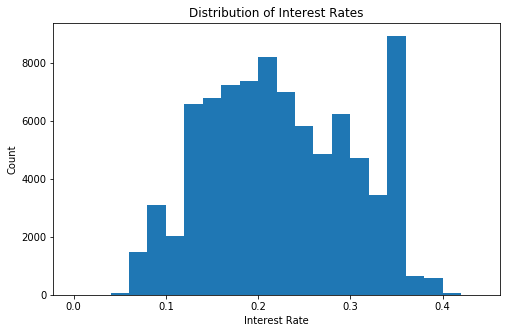

In [6]:
plt.figure(figsize = [8,5])
binsize = 0.02
bins = np.arange(0, df['BorrowerAPR'].max() + binsize, binsize)
plt.hist(data = df, x = 'BorrowerAPR', bins = bins)
plt.xlabel('Interest Rate')
plt.ylabel('Count')
plt.title('Distribution of Interest Rates')
plt.show()

## Interest Rate vs. Risk Score

Each loan is assigned a risk score. The lower the risk score, the more risky the loan is for Prosper.

The interest rate has a negative relationship with the risk score. Loans with lower risk scores have high interest rates with a small interquartile range.

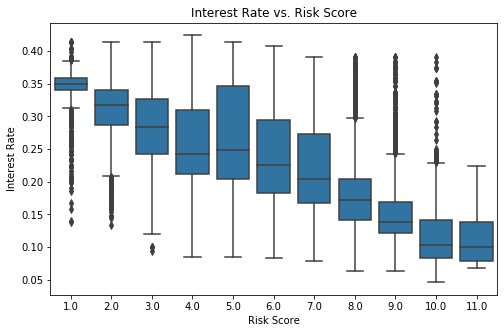

In [7]:
plt.figure(figsize = [8,5])
sb.boxplot(data = df, x = 'ProsperScore', y = 'BorrowerAPR', color = color)
plt.xlabel('Risk Score')
plt.ylabel('Interest Rate')
plt.title('Interest Rate vs. Risk Score')
plt.show()

## Interest Rate vs. Type of Loan

The interest rate is the lowest for boat purchases at 0.205 and the highest for loans with an undisclosed loan type at 0.275.

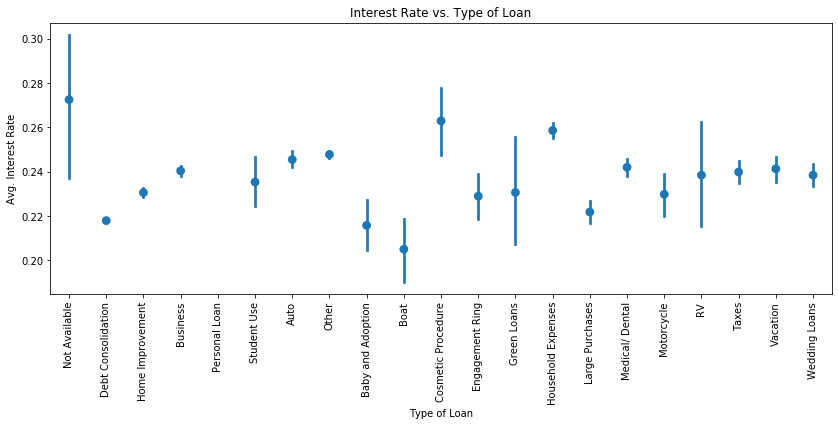

In [8]:
plt.figure(figsize = [14,5])
sb.pointplot(data = df, x = 'ListingCat', y = 'BorrowerAPR', color = color, linestyles = '')
plt.ylabel('Avg. Interest Rate')
plt.xlabel('Type of Loan')
plt.xticks(rotation = 90)
plt.title('Interest Rate vs. Type of Loan')
plt.show()

## Interest Rate vs. Loan Status

Loans that have defaulted or were charged off have an average interest of more than 0.29.

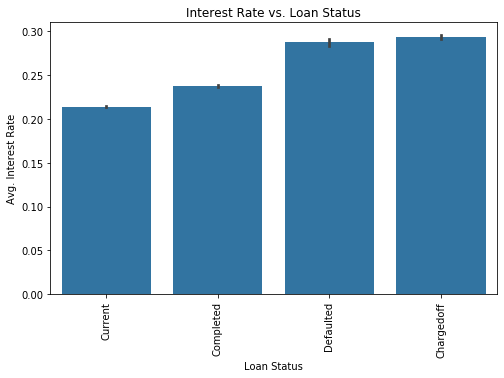

In [9]:
plt.figure(figsize = [8,5])
sb.barplot(data = df, x = 'LoanStatus', y = 'BorrowerAPR', color = color, order = ['Current','Completed','Defaulted','Chargedoff'])
plt.xticks(rotation = 90)
plt.xlabel('Loan Status')
plt.ylabel('Avg. Interest Rate')
plt.title('Interest Rate vs. Loan Status')
plt.show()

## Interest Rate vs. Credit Score

The interest rate also has a negative relationship with the borrower's credit score. Borrowers with high credit scores are able to get low interest rates for their loans but this relationship is less linear at high credit score levels.

The average interest rate for borrowers with the minimum credit score is 0.35.

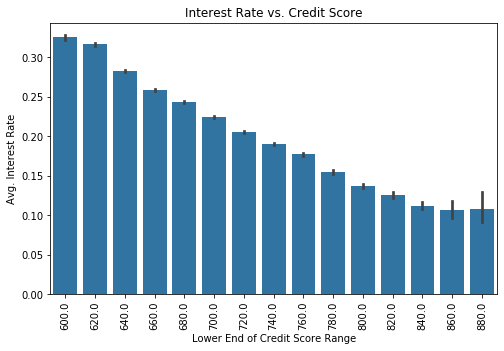

In [10]:
plt.figure(figsize = [8,5])
sb.barplot(data = df, x = 'CreditScoreRangeLower', y = 'BorrowerAPR', color = color)
plt.xlabel('Lower End of Credit Score Range')
plt.ylabel('Avg. Interest Rate')
plt.xticks(rotation = 90)
plt.title('Interest Rate vs. Credit Score')
plt.show()

## Interest Rate vs. Risk Score for Different Loan Types

While the relationship between the interest rate and the risk score is negative, the strength of the correlation varies for different loan types.

For debt consolidation loans, which is the most frequent loan type, the interest rate is lower for most risk scores compared to other loan types. However for student loans, the interest rate has a peak in the middle instead of having a linear relationship.

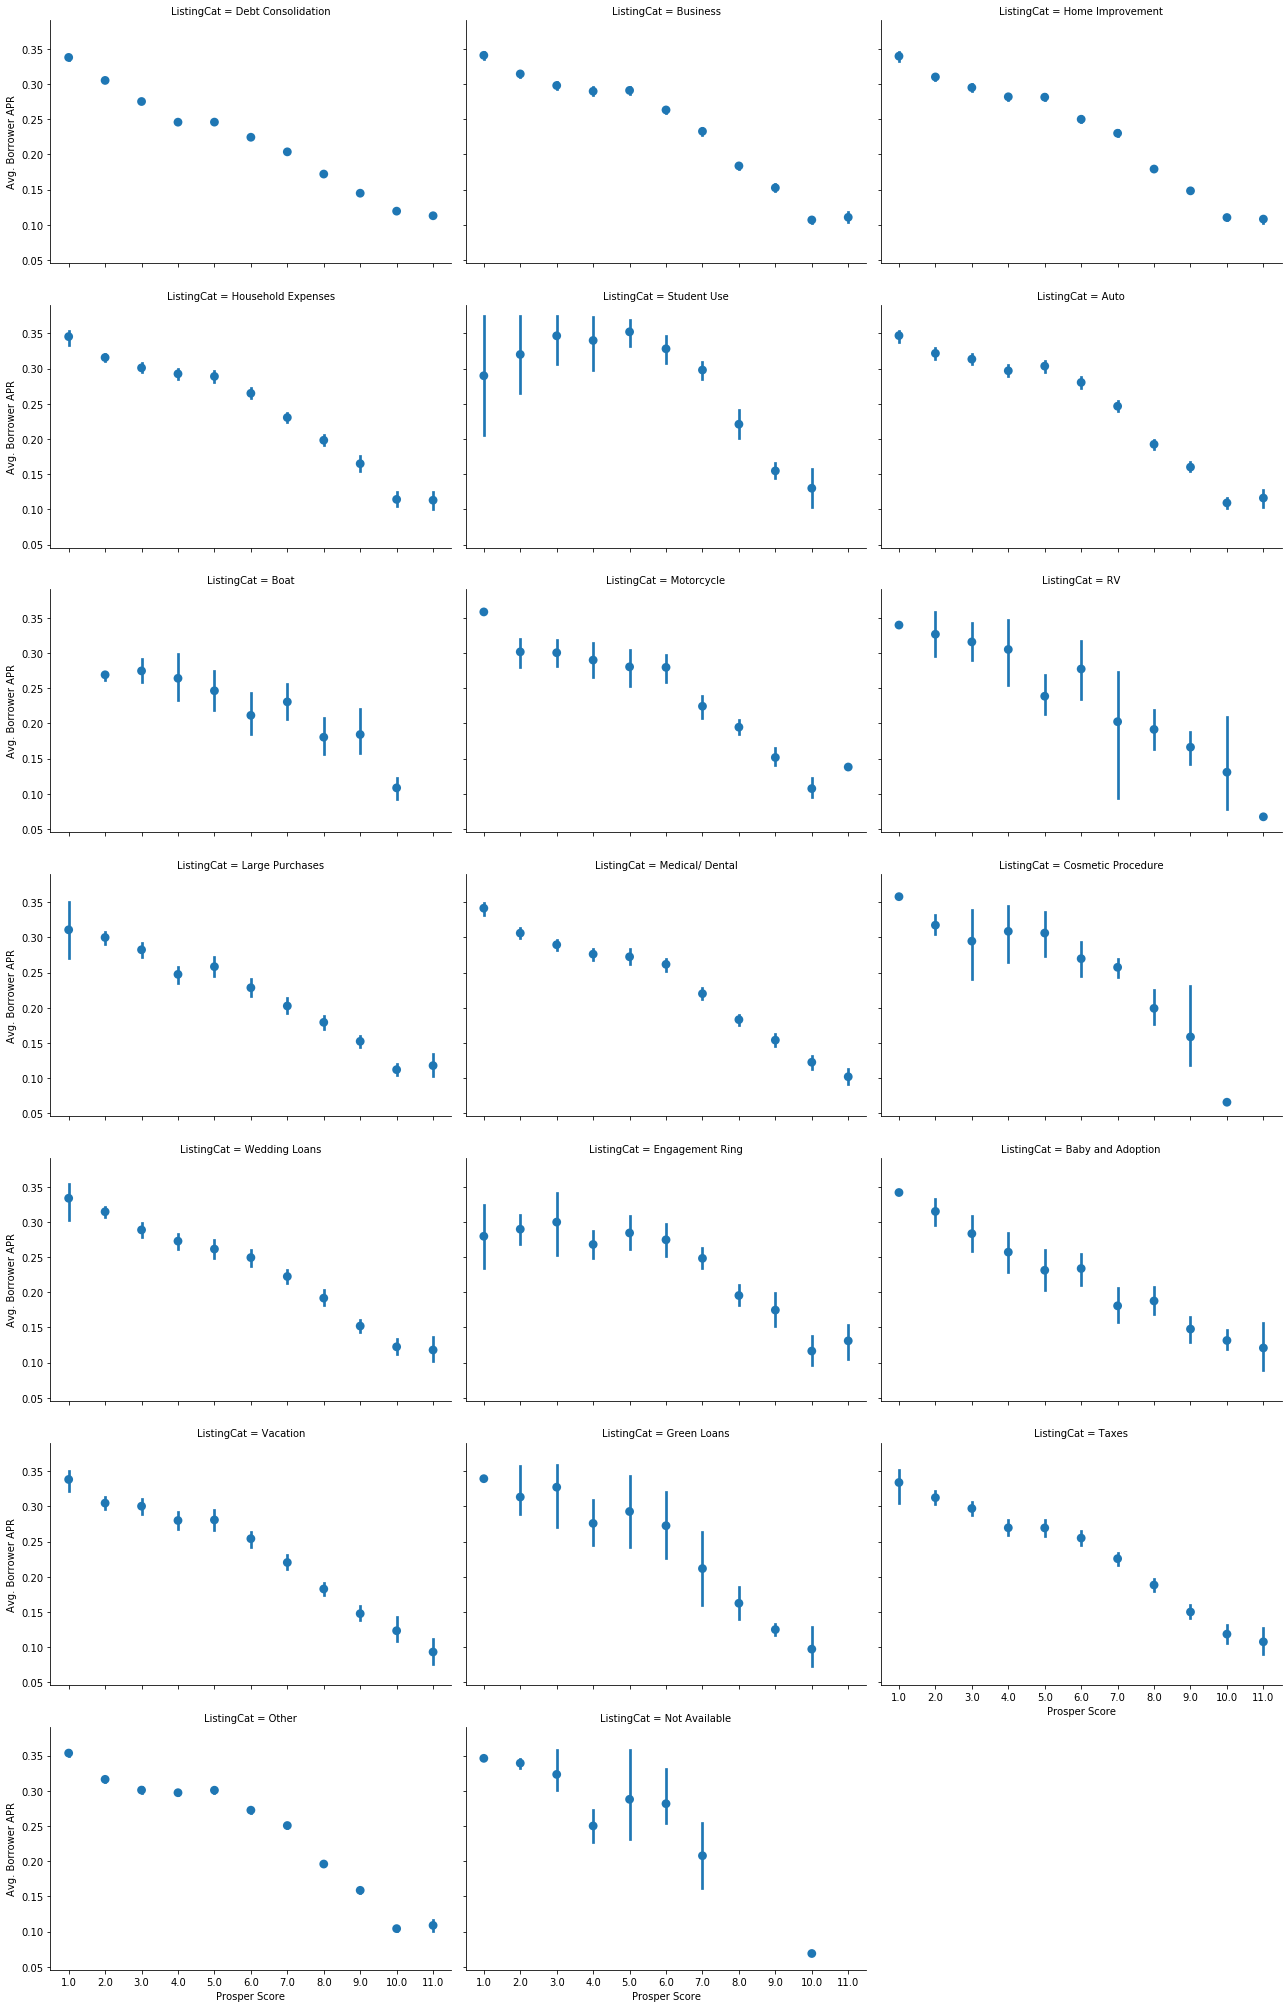

In [11]:
# relationship between BorrowerAPR and ProsperScore faceted by ListingCat using point plot
    
col_order = ['Debt Consolidation','Business','Home Improvement','Household Expenses','Student Use','Auto','Boat','Motorcycle','RV','Large Purchases','Medical/ Dental','Cosmetic Procedure','Wedding Loans','Engagement Ring','Baby and Adoption','Vacation','Green Loans','Taxes','Other','Not Available']
g = sb.FacetGrid(data = df, col = 'ListingCat', col_wrap = 3, height = 4, aspect = 1.5, margin_titles = True, col_order = col_order)
g.map(sb.pointplot, 'ProsperScore', 'BorrowerAPR', linestyles = '', order = [1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0])
g.set_xlabels('Prosper Score')
g.set_ylabels('Avg. Borrower APR')
plt.show()

## Interest Rate vs. Risk Rating for Different Loan Status

The largest proportion of completed loans have high risk scores and low interest rates. However loans that have defaulted or were charged off have moderate risk but very high interest rates.

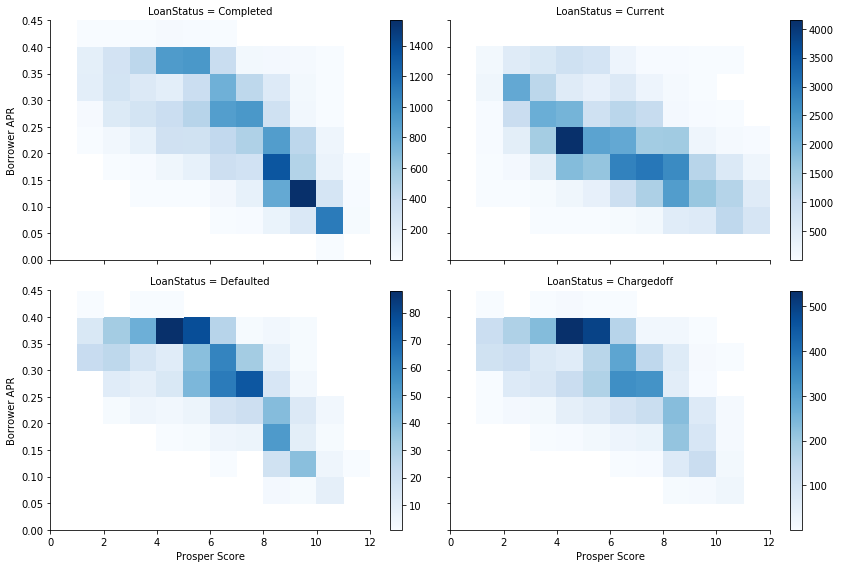

In [12]:
# relationship between BorrowerAPR and ProsperScore faceted by LoanStatus using heatmap

# sb.FacetGrid.map() can only accept a plotting function that takes color as a kwarg. so custom function is needed to call matplotlib's hist2d function
def hist2dgrid(x, y, color, **kwargs):
    binsize_x = 1
    bins_x = np.arange(0, df['ProsperScore'].max()+binsize_x+1, binsize_x)
    binsize_y = 0.05
    bins_y = np.arange(0, df['BorrowerAPR'].max()+binsize_y, binsize_y)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = color, cmin = 0.5)
    plt.colorbar()
    
col_order = ['Completed','Current','Defaulted','Chargedoff']
g = sb.FacetGrid(data = df, col = 'LoanStatus', col_wrap = 2, height = 4, aspect = 1.5, margin_titles = True, col_order = col_order)
g.map(hist2dgrid, 'ProsperScore', 'BorrowerAPR', color = 'Blues')
g.set_xlabels('Prosper Score')
g.set_ylabels('Borrower APR')
plt.show()

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert Effects\ of\ Loan\ Features\ on\ Interest\ Rates\ -\ Part\ Two.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!